In [165]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Álgebra lineal

**3.** Implemente un algoritmo que realice la multiplicación de dos matrices. Use el algoritmo para calcular:
$$AB = \begin{bmatrix} 1 & 0& 0 \\ 5 &1 &0 \\ -2 &3 &1  \end{bmatrix}\begin{bmatrix} 4 & -2& 1 \\ 0 &3 &7 \\ 0 &0 &2  \end{bmatrix}$$

In [3]:
AB = np.zeros((3,3))
A = np.array([[1,0,0],[5,1,0],[-2,3,1]])
B = np.array([[4,-2,1],[0,3,7],[0,0,2]])

for i in range(len(A)):
    for j in range(len(B[:,0])):
        AB[i][j] = np.dot(A[i],B[:,j])
        
print(AB)
        

[[ 4. -2.  1.]
 [20. -7. 12.]
 [-8. 13. 21.]]


**4.** Muestre con detalle que la sustitución hacia adelante se expresa como: $$ x_i = b_i - \sum_{j=0}^{i-1}A_{ij}x_j$$

**Solución:** Teniendo en cuenta el sistema $$A\vec{x} = \vec{b}$$ se puede hacer la sustitución $L(U\vec{x}) = \vec{b}$ y la sustitución hacia adelante $L\vec{y} = \vec{b}$. Dado que la matriz $L$ tiene forma triangular inferior, se tiene que 
$$
\begin{bmatrix} 1 & 0 & \dots & 0 \\ \ell_{21} & 1 & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ \ell_{n1} & \ell_{n2} & \dots & 1 \end{bmatrix}
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{bmatrix} =
\begin{bmatrix}
b_1 \\ b_2 \\ \vdots \\ b_n
\end{bmatrix}
$$
Es decir,
$$
\begin{align*}
y_1 &= b_1 \\
\ell_{21}y_1 + y_{2} &= b_2 \\
\ell_{31}y_1 + \ell_{32}y_{2} + y_3 &= b_3\\
\vdots \\
\sum_{j = 1}^{i-1}\ell_{ij}y_{j} + y_i &= b_i 
\end{align*}
$$
Esto es, entonces
$$y_i = b_i - \sum_{j=1}^{i-1}\ell_{ij}y_j$$
Como se quería. $\blacksquare$

**5.** Muestre con detaller que la sustitución hacia atrás se expresa como:

$$x_i = \frac{b_i - \displaystyle\sum_{j = i+1}^{n}A_{ij}x_j}{A_{ii}}$$

**Solución:** Teniendo en cuenta la sustitución $U\vec{x} = \vec{y}$. Dado que la matriz $U$ tiene forma triangular superior, se tiene que 
$$
\begin{bmatrix} u_{11} & u_{12} & \dots & u_{1n} \\ 0 & u_{22} & \dots & u_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \dots &u_{nn}\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}
= \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
$$
Lo cual se puede expresar como un conjunto de ecuacioens lineales
$$
\begin{align*}
u_{11}x_1 + u_{12}x_2 + u_{13}x_3 + u_{14}x_4 + \dots + u_{1n}x_n &= y_1 \\
u_{22}x_2 + u_{23}x_3 + u_{24}x_4 + \dots + u_{2n}x_n &= y_2 \\
 u_{33}x_3 + u_{34}x_4 + \dots + u_{3n}x_n &= y_3\\
 \vdots \\
 u_{ii}x_i + \sum_{j = i +1}^{n}u_{ij}x_j &= y_i
\end{align*}
$$
Despejando $x_i$, se tiene que 
$$x_i = \frac{y_i - \displaystyle\sum_{j=i+1}^{n}u_{ij}x_j}{u_{ii}}.$$

Como se quería. $\blacksquare$

**6.** Use el método de sobrerelajación sucesiva para solucionar el sistema:
$$
\left\{
\begin{align*}
3x_1 - x_2- x_3 = 1 \\
-x_1 + 3x_2 + x_3 = 3\\
2x_1 + x_2 +4x_3 = 7
\end{align*}
\right.
$$

In [4]:
def sor_solver(A, b, omega, initial_guess, convergence_criteria):

    phi = initial_guess[:]
    residual = np.linalg.norm(A @ phi - b)  # Initial residual
    while residual > convergence_criteria:
        for i in range(A.shape[0]):
            sigma = 0
            for j in range(A.shape[1]):
                if j != i:
                    sigma += A[i, j] * phi[j]
            phi[i] = (1 - omega) * phi[i] + (omega / A[i, i]) * (b[i] - sigma)
        residual = np.linalg.norm(A @ phi - b)
    return phi

residual_convergence = 1e-8
omega = 1.3

A = np.array([[3,-1,-1],
              [-1,3,1],
              [2,1,4]])

b = np.array([1, 3, 7])

initial_guess = np.zeros(3)

phi = sor_solver(A, b, omega, initial_guess, residual_convergence)
print("x_1: %s, x_2: %s, x_3: %s"%(phi[0],phi[1],phi[2]))

x_1: 1.0000000017524404, x_2: 0.9999999997215512, x_3: 0.9999999983063279


**7.** Implemente la descomposición LU para factorizar la siguiente matriz $A = LU$.
$$A = \begin{bmatrix} 4 & -2 & 1 \\ 20 & -7 & 12 \\ -8 & 13 & 17 \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 \\ 5 & 1 & 0 \\ -2 & 3 & 1 \end{bmatrix} \begin{bmatrix} 4 & -2 & 1 \\ 0 & 3 & 7 \\ 0 & 0 & -2 \end{bmatrix}$$

In [5]:
def LU_fact(A):
    n = A[0].size
    L = np.identity(n)
    for i in range(0,n):
        for j in range(i+1,A[0].size):
            I = np.identity(n)
            I[j][i] = -A[j][i]/A[i][i]
            L[j][i] = A[j][i]/A[i][i]
            A = I@A
    return L,A

A = np.array([[4,-2,1],[20,-7,12],[-8,13,17]])

print("Lower matrix: \n %s \n Upper matrix: \n %s  "%LU_fact(A))

Lower matrix: 
 [[ 1.  0.  0.]
 [ 5.  1.  0.]
 [-2.  3.  1.]] 
 Upper matrix: 
 [[ 4. -2.  1.]
 [ 0.  3.  7.]
 [ 0.  0. -2.]]  


 **9.** Método de Jacobi: diagonalización de matrices simétricas.
 
 **(a)** Implemente el método de Jacobi para encontrar los valores y vectores propios de:
 $$A = \begin{bmatrix} 4 & 1 & 1 \\ 1 & 3 & 2 \\ 1 & 2 & 5 \end{bmatrix}$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt



def R(A):
    I = np.identity(A[0].size)
    index = look4the_greatest(A)
    if index == None:
        return None
    if index == (1,0):
        theta = 0.5*np.arctan(2*A[0,1]/(A[1,1]-A[0,0]))
        I[1][0] = -np.sin(theta)
        I[0][1] = np.sin(theta)
        I[0][0] = np.cos(theta)
        I[1][1] = np.cos(theta)
    elif index == (2,0):
        theta = 0.5*np.arctan(2*A[0,2]/(A[2,2]-A[0,0]))
        I[2][0] = -np.sin(theta)
        I[0][2] = np.sin(theta)
        I[0][0] = np.cos(theta)
        I[2][2] = np.cos(theta)
    elif index == (2,1):
        theta = 0.5*np.arctan(2*A[1,2]/(A[2,2]-A[1,1]))
        I[2][1] = -np.sin(theta)
        I[1][2] = np.sin(theta)
        I[1][1] = np.cos(theta)
        I[2][2] = np.cos(theta)
    return (I,I.T)

def look4the_greatest(A):
    n = A[0].size
    fila = 1
    columna = 0
    for i in range(1,n):
        for j in range(0,i):
            if abs(A[i,j]) >= abs(A[fila,columna]):
                fila = i
                columna = j
    return (fila, columna)

def diag(A):
    while A[look4the_greatest(A)[0],look4the_greatest(A)[1]] >= 1e-20:
        r,rt = R(A)
        A = rt@A@r
    return A
    
    
    



A = np.matrix([[4,1,1],[1,3,2],[1,2,5]])
print(diag(A).round(3))



[[ 3.397e+00 -1.000e-03 -0.000e+00]
 [-1.000e-03  1.708e+00 -0.000e+00]
 [-0.000e+00 -0.000e+00  6.895e+00]]


**(b)**  Compare con el resultado dado por Numpy

In [7]:
eigen_val, deli = np.linalg.eig(A)
eigen_val.round(3)

array([6.895, 3.397, 1.708])

**10.**  **Quantum system - ground state:** Un sistema cuántico de tres niveles está descrito
por el siguiente Hamiltoniano: $$\hat{H} = \begin{bmatrix} 1 & 2 & -1 \\ 1 & 0 & 1 \\ 4 & -4 & 5 \end{bmatrix}$$
Implemente el algoritmo de la potencia inversa para encontrar el valor del estado base $| \psi_0 \rangle$  y su valor propio asociado $E_0$.

In [8]:
H = np.linalg.inv(np.matrix([[1,2,-1],[1,0,1],[4,-4,5]]))
psi_before = np.matrix([[-1,-1,1]]).T
psi_actual = psi_before


while True:
    psi_before = psi_actual
    psi_actual = H@(psi_before/np.linalg.norm(psi_before))
    if np.linalg.norm(psi_before - psi_actual) <= 1e-7:
        break
print("Valor del estado base:", psi_actual.T)
print("Valor del valor propios asociado al estado base:", np.linalg.norm(psi_actual))


Valor del estado base: [[ 0.40824832 -0.40824834 -0.81649665]]
Valor del valor propios asociado al estado base: 1.0000000874178


**12. Jacobiano de cuarto orden:** Usando el operador derivada central de orden $\mathcal{O}(h^4)$ es posible mejorar la estimación del jacobiano para funciones vectoriales.

**(a)** Escriba una función que estime el jacobiano con el operador derivada de orden $\mathcal{O}(h^4)$.

In [95]:
def function1(x):
    return 6*x[0] -2*np.cos(x[1]*x[2])

def function2(x):
    return 9*x[1] + np.sqrt(x[0]**2 + np.sin(x[2]) + 1.06) +0.9

def function3(x):
    return 60*x[2] + 3*np.exp(-x[0]*x[1]) + 10*np.pi - 3

functs = [function1,function2,function3]

def derivadah4(f,x,h,i):
    index = np.zeros(x.size)
    index[i] = h
    return (f(x - 2*index) - 8*f(x - index) + 8*f(x + index) - f(x +2*index))/(12*h)

def derivadah2(f,x,h,i):
    index = np.zeros(x.size)
    index[i] = h
    return (f(x + index)  - f(x -index))/(2*h)

def Jacobian(derivada,functs,x,h):
    n = x.size
    J = np.zeros((len(functs),n))
    print(J)
    index = np.zeros(n)
    for i in range(len(functs)):
        for j in range(n):
            J[i,j] = derivada(functs[i],x,h,j)
    return J


**(b)** Estime el Jacobiano de la función del problema anterior (5.70) en el punto x = (0.5, 0.5, 0.5) con h = 0.01.

In [96]:
Jacobian(derivadah4,functs,np.array([0.5,0.5,0.5]),0.01)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


array([[ 6.        ,  0.24740396,  0.24740396],
       [ 0.37377753,  9.        ,  0.32802064],
       [-1.16820117, -1.16820117, 60.        ]])

**(c)** Estime el Jacobiano usando la aproximación de orden $\mathcal{O}(h^2)$ con h = 0.01. ¿Para qué valor de h, el operador de segundo orden igualaría en precisión al operador de cuarto orden; verifique su intuición en el código.

In [98]:
Jacobian(derivadah2,functs,np.array([0.5,0.5,0.5]),0.01)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


array([[ 6.        ,  0.24740293,  0.24740293],
       [ 0.37376854,  9.        ,  0.32801836],
       [-1.16820604, -1.16820604, 60.        ]])

**13.** El grupo de rotaciones $SO(3)$ describe las rotaciones en el espacio. Este grupo tiene el siguiente grupo de generadores:
$$J_x = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix},\ J_y = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 0 & 0 \\ -1 & 0 & 0 \end{bmatrix},\ J_z = \begin{bmatrix} 0 & -1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}$$ 

In [36]:
J_x = np.matrix([[0,0,0],
                 [0,0,-1],
                 [0,1,0]])

J_y = np.matrix([[0,0,1],
                 [0,0,0],
                 [-1,0,0]])

J_z = np.matrix([[0,-1,0],
                 [1,0,0],
                 [0,0,0]])

J = [J_x,J_y,J_z]

a = [1,2,3]

b = [1,2,3]


def conmutador(A,B):
    return A@B - B@A

def levi_civita(ijk):

    if ijk == [0,1,2] or ijk == [1,2,0] or ijk == [2,0,1]:
        return 1
    elif ijk == [2,1,0] or ijk == [0,2,1] or ijk == [1,0,2]:
        return -1
    else:
        return 0
    
for i in range(3):
    for j in range(3):
        print("Conmutación con (%s,%s)"%(i+1,j+1))
        print(conmutador(J[i],J[j]))
print("*"*50)   
A = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        for k in range(3):
            A += levi_civita([i,j,k])*J[k]
        print("Conmutación con (%s,%s)"%(i+1,j+1))
        print(A)
        A = np.zeros((3,3))

True
Conmutación con (1,1)
[[0 0 0]
 [0 0 0]
 [0 0 0]]
Conmutación con (1,2)
[[ 0 -1  0]
 [ 1  0  0]
 [ 0  0  0]]
Conmutación con (1,3)
[[ 0  0 -1]
 [ 0  0  0]
 [ 1  0  0]]
Conmutación con (2,1)
[[ 0  1  0]
 [-1  0  0]
 [ 0  0  0]]
Conmutación con (2,2)
[[0 0 0]
 [0 0 0]
 [0 0 0]]
Conmutación con (2,3)
[[ 0  0  0]
 [ 0  0 -1]
 [ 0  1  0]]
Conmutación con (3,1)
[[ 0  0  1]
 [ 0  0  0]
 [-1  0  0]]
Conmutación con (3,2)
[[ 0  0  0]
 [ 0  0  1]
 [ 0 -1  0]]
Conmutación con (3,3)
[[0 0 0]
 [0 0 0]
 [0 0 0]]
**************************************************
Conmutación con (1,1)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Conmutación con (1,2)
[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
Conmutación con (1,3)
[[ 0.  0. -1.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]
Conmutación con (2,1)
[[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  0.]]
Conmutación con (2,2)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Conmutación con (2,3)
[[ 0.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  1.  0.]]
Conmutación con (3,1)
[[ 0.  0.  1.]
 [ 0.  0.  0.

**14.** El grupo de rotación $SU(2)$ (special unitary dim 2) describe
el operador de espín para una partícula fundamental con s =$\frac{1}{2}$. Este grupo tiene el
siguiente conjunto de generadores:
$$\sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, \sigma_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}, \sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$

Verifique que el álgebra de Lie del grupo está dada por:
$$[\sigma_i,\sigma_j] = 2i\epsilon_{ijk}\sigma_k$$

In [38]:
sigma_x = np.matrix([[0,1],
                    [1,0],])

sigma_y = np.matrix([[0,-1J],
                    [1J,0],])

sigma_z = np.matrix([[1,0],
                    [0,-1],])

sigma = [sigma_x,sigma_y,sigma_z]

for i in range(3):
    for j in range(3):
        print("Conmutación con (%s,%s)"%(i+1,j+1))
        print(conmutador(sigma[i],sigma[j]))
        
print("*"*50)   
A = np.zeros((2,2)).astype(np.complex128)
for i in range(3):
    for j in range(3):
        for k in range(3):
            A += 2J*levi_civita([i,j,k])*sigma[k]
        print("Conmutación con (%s,%s)"%(i+1,j+1))
        print(A)
        A = np.zeros((2,2)).astype(np.complex128)
    

Conmutación con (1,1)
[[0 0]
 [0 0]]
Conmutación con (1,2)
[[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]]
Conmutación con (1,3)
[[ 0 -2]
 [ 2  0]]
Conmutación con (2,1)
[[0.-2.j 0.+0.j]
 [0.+0.j 0.+2.j]]
Conmutación con (2,2)
[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Conmutación con (2,3)
[[0.+0.j 0.+2.j]
 [0.+2.j 0.+0.j]]
Conmutación con (3,1)
[[ 0  2]
 [-2  0]]
Conmutación con (3,2)
[[0.+0.j 0.-2.j]
 [0.-2.j 0.+0.j]]
Conmutación con (3,3)
[[0 0]
 [0 0]]
**************************************************
Conmutación con (1,1)
[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Conmutación con (1,2)
[[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]]
Conmutación con (1,3)
[[ 0.+0.j -2.+0.j]
 [ 2.+0.j  0.+0.j]]
Conmutación con (2,1)
[[0.-2.j 0.+0.j]
 [0.+0.j 0.+2.j]]
Conmutación con (2,2)
[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Conmutación con (2,3)
[[0.+0.j 0.+2.j]
 [0.+2.j 0.+0.j]]
Conmutación con (3,1)
[[ 0.+0.j  2.+0.j]
 [-2.+0.j  0.+0.j]]
Conmutación con (3,2)
[[0.+0.j 0.-2.j]
 [0.-2.j 0.+0.j]]
Conmutación con (3,3)
[[0.+0.j 0.+0.j]
 [0.+

**15.**  La matrices de Dirac $\{ \gamma^0, \gamma^1, \gamma^2, \gamma^3\}$ son una representación
del álgebra de Clifford $CL_{1,3}(\mathbb{R})$, que transforman correctamente el espacio de espinores
de la teoría cuántica de campos:
$$ \gamma^0 = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & -1 & 0 \\ 0 & 0 & 0 & -1 \end{bmatrix},\  \gamma^1 = \begin{bmatrix} 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & -1 & 0 & 0 \\ -1 & 0 & 0 & 0\end{bmatrix},\\ \gamma^2 = \begin{bmatrix} 0 & 0 & 0 & -i \\ 0 & 0 & i & 0 \\ 0 & i & 0 & 0 \\ -i & 0 & 0 & 0 \end{bmatrix},\ \gamma^3 = \begin{bmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \\ -1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \end{bmatrix}$$

Verifique que el álgebra de Clifford está dada por una realción de anticonmutación. Esto es: $$\{ \gamma^\mu, \gamma^\nu\} =\gamma^\mu \gamma^\nu + \gamma^\nu\gamma^\mu = 2g^{\mu\nu}I_{4\times4} $$

con $$g^{\mu\nu} = \begin{bmatrix} -1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}$$

In [45]:
gamma_0 = np.matrix([[1,0,0,0],
                    [0,1,0,0],
                    [0,0,-1,0],
                    [0,0,0,-1]])

gamma_1 = np.matrix([[0,0,0,1],
                    [0,0,1,0],
                    [0,-1,0,0],
                    [-1,0,0,0]])

gamma_2 = np.matrix([[0,0,0,-1J],
                    [0,0,1J,0],
                    [0,1J,0,0],
                    [-1J,0,0,0]])

gamma_3 = np.matrix([[0,0,1,0],
                    [0,0,0,-1],
                    [-1,0,0,0],
                    [0,1,0,0]])

g = np.matrix([[-1,0,0,0],
                    [0,1,0,0],
                    [0,0,1,0],
                    [0,0,0,1]])

gamma = [gamma_0,gamma_1,gamma_2,gamma_3]

for i in range(4):
    for j in range(4):
        print("Conmutación con (%s,%s)"%(i,j))
        print(gamma[i]@gamma[j] + gamma[j]@gamma[i])

print("*"*20)

for i in range(4):
    for j in range(4):
        print("Conmutación con (%s,%s)"%(i,j))
        print(2*g[i,j]*np.identity(4))

Conmutación con (0,0)
[[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 2]]
Conmutación con (0,1)
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Conmutación con (0,2)
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
Conmutación con (0,3)
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Conmutación con (1,0)
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Conmutación con (1,1)
[[-2  0  0  0]
 [ 0 -2  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -2]]
Conmutación con (1,2)
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
Conmutación con (1,3)
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Conmutación con (2,0)
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
Conmutación con (2,1)
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+

# Mínimos cuadrados

**1.** Se tienen tres líneas en $\mathbb{R}^2$:
$$2x - y = 2 \\ x + 2y = 1 \\ x+y = 4$$

**(a)** Con el método de mínimos cuadrados encuentre el punto común a las tres líneas.
Grafique las tres líneas y el punto solución, ¿qué interpretación puede dar?


<IPython.core.display.Javascript object>


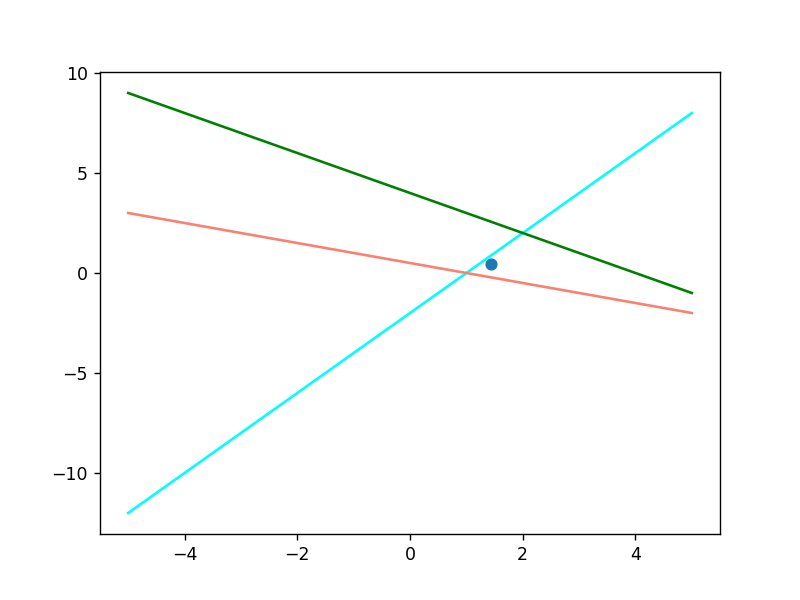

In [190]:
A = np.array([[2.,-1.],
              [1.,2.],
              [1.,1.]])

b = np.array([2.,1.,4.])

x0 = np.array([1.,2.])

B = A.T@A
b1 = A.T@b


def Shaco(A,b,x0, itmax=1000, tolerancia= 1e-9):
    
    x = x0.copy()
    
    for it in range(itmax):
        
        xn = np.zeros_like(x0)
        
        for i in range(A.shape[0]):
            sum_ = 0.
            
            for j in range(A.shape[1]):
                
                if j!=i:
                    sum_ += A[i,j]*x[j]
                    
            xn[i] = (b[i] - sum_)/A[i,i]
                    
        residuo = np.linalg.norm( np.dot(A,xn) - b )
        x = xn.copy()
        
        if np.allclose(residuo,tolerancia,atol=tolerancia):
            break
        
    return x

x = np.linspace(-5,5,1000)
f1 = 2*x -2
f2 = 0.5 -0.5*x
f3 = 4 - x
r = Shaco(B,b1,x0)
plt.plot(x,f1,"cyan")
plt.plot(x,f2,"salmon")
plt.plot(x,f3,"green")
plt.scatter(r[0],r[1])


**(b)**  Realice una búsqueda iterativa entre $−5 \leq x \leq 5$ y $−5 \leq y \leq 5$ con un paso de
$h = 0.01$ para encontrar la menor distancia del problema. Grafique la distancia y
compare con el resultado obtenido con mínimos cuadrados.

<IPython.core.display.Javascript object>


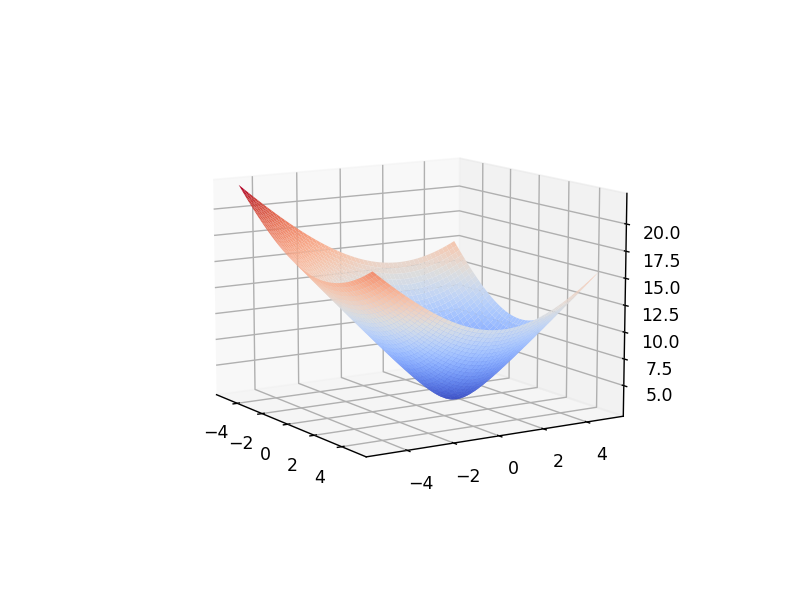

In [196]:
x = np.arange(-5,5,0.01)
y = np.arange(-5,5,0.01)
z = np.zeros((len(x), len(x)))



for i in range(x.size):
    for j in range(y.size):
        v = np.array([x[i],y[j]])
        z[i][j] = np.linalg.norm(A@v - b)

x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='coolwarm')
plt.show()

**6.** Este punto se puede encontrar en la carpeta: 'adicionales/punto6'

**7.** 

In [3]:
import numpy as np
import pandas as pd
import sympy as sym


import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import axes3d
from matplotlib import rc

import pandas as pd
from tqdm import tqdm
from time import sleep
import os.path as path
import os


Punto 7

Descargar el archivo 

In [4]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
descargar = pd.read_csv(url)

x_data = descargar["x"]
y_data = descargar["y"]


a) Defina el modelo de ajuste

In [105]:
t_0 = sym.symbols("t_0", real=True)
t_1 = sym.symbols("t_1", real=True)
t_2 = sym.symbols("t_2", real=True)
x = sym.symbols("x", real=True)



def modelo_ajuste():
    funcion =  t_0 / (t_1 + (sym.exp(-t_2*x)))
    return funcion

b) Definir función costo

In [106]:
def funcion_costo(x,y,angulo):
    valor = np.sum((y - funcion_costo(x,angulo)**2))
    return valor

Demostraciones de los puntos c y d se encuentran en la carpeta 'adicionales/punto7'

e) Resuelva con ciertos parametros

In [110]:

#Crear ecuaciones

def gradiente ():
    d_t_0 = sym.lambdify([x,t_0,t_1,t_2],sym.diff(modelo_ajuste(), t_0))
    d_t_1 = sym.lambdify([x,t_0,t_1,t_2],sym.diff(modelo_ajuste(), t_1))
    d_t_2 = sym.lambdify([x,t_0,t_1,t_2],sym.diff(modelo_ajuste(), t_2))
    

    return d_t_0, d_t_1, d_t_2

def gradiente_decendiente(funcion,x,y,angulo,interaciones,parada,aprendizaje):
    error=parada+1
    n=0
    grad0, grad1,grad2=gradiente()

    while error>parada and n<interaciones:
        suma=0
        for i in range(len(y)):
            dgrad0=grad0(x[i],angulo[0],angulo[1],angulo[2])
            dgrad1=grad1(x[i],angulo[0],angulo[1],angulo[2])
            dgrad2=grad2(x[i],angulo[0],angulo[1],angulo[2])
            suma+=(y[i]-funcion(x[i],angulo[0],angulo[1],angulo[2]))*np.array([dgrad0,dgrad1,dgrad2])
        angulonuevo=angulo-(-2*aprendizaje*suma)
        angulo=angulonuevo
        error=np.linalg.norm(-2*aprendizaje*suma)
        n+=1
    return angulonuevo


def descenso_gradiente(eq,x,y,vector,n,epsilon, phi):
    i = 0
    checker = epsilon +1
    d_g_0, d_g_1 , d_g_2 = gradiente()
    while checker>epsilon and i<n:
   
        result = 0
        for every in range(len(y)):
            
        
            theta_0 = d_g_0(x[every], vector[0], vector[1], vector[2])
            theta_1 = d_g_1(x[every], vector[0], vector[1], vector[2])
            theta_2 = d_g_2(x[every], vector[0], vector[1], vector[2])
            
            
            result += (y[every]-eq(x[every],vector[0], vector[1], vector[2]))*np.array([theta_0, theta_1, theta_2])
        
        vector_nuevo = vector - ( -phi* 2*prev_result)
        vector= vector_nuevo
        checker = np.linalg.norm(phi * (-2*prev_result))
        i += 1
        
    
    return vector_nuevo

f) Gráfica

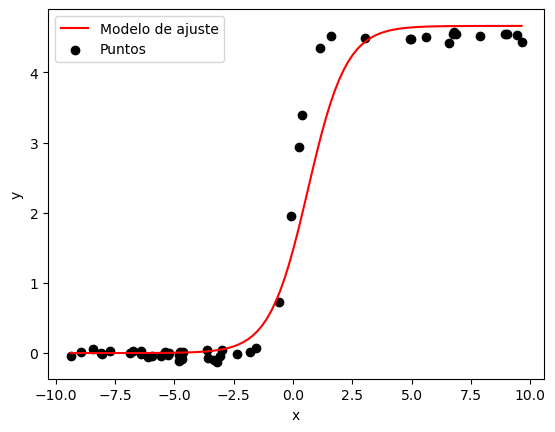

In [112]:
#parametros 
n = 1000
phi = 0.001
epsilon =0.01
theta = [1,1,1]
equation = sym.lambdify([x,t_0,t_1,t_2],modelo_ajuste())


lista_theta = descenso_gradiente(equation,x_data,y_data,theta,n, epsilon,phi)
X_Graph = np.linspace(np.min(x_data), np.max(x_data) ,100)
Y_Graph = []
for every in X_Graph:
    Y_Graph.append(lista_theta[0] / (lista_theta[1] + sym.exp(-lista_theta[2]*every)))



plt.xlabel('x')
plt.ylabel('y')
plt.plot(X_Graph,Y_Graph,color='red', label='Modelo de ajuste')
plt.scatter(x_data,y_data,color='black', label='Puntos')
plt.legend()
